<a href="https://colab.research.google.com/github/Hizbucodes/3rd-Year-ML/blob/main/yr3cobsccomp232p_006.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
employee_df = pd.read_csv('/content/dataset_5_24_CW.csv')
employee_df

,EmployeeID,Age,MonthlyIncome (Rs),EduQualification,FamilySize,HouseholdIncome (Rs),WorkExp (Years)
0,1,33,473192,Mphil,1,56336,NaN
1,2,33,93240,MSc,0,201833,10.0
2,3,34,50229,BScHons,0,764262,16.0
3,4,43,271935,PhD,1,729330,2.0
4,5,54,948470,Mphil,1,694342,19.0
...,...,...,...,...,...,...,...
9995,9996,32,458915,MA,4,764566,16.0
9996,9997,54,325719,OL,3,487682,10.0
9997,9998,38,389239,MSc,1,715151,12.0
9998,9999,44,96855,Bcom,1,902791,29.0


In [ ]:
employee_df.describe(include='all')

,EmployeeID,Age,MonthlyIncome (Rs),EduQualification,FamilySize,HouseholdIncome (Rs),WorkExp (Years)
count,10000.00000,10000.000000,10000.000000,10000,10000.000000,10000.000000,9995.000000
unique,NaN,NaN,NaN,9,NaN,NaN,NaN
top,NaN,NaN,NaN,BA,NaN,NaN,NaN
freq,NaN,NaN,NaN,1161,NaN,NaN,NaN
mean,5000.50000,41.417300,502767.505300,NaN,2.485200,502371.838500,15.497649
std,2886.89568,13.987706,286176.167013,NaN,1.708881,286409.957135,8.625886
min,1.00000,18.000000,10196.000000,NaN,0.000000,10007.000000,1.000000
25%,2500.75000,29.000000,254288.000000,NaN,1.000000,251349.750000,8.000000
50%,5000.50000,41.000000,501147.500000,NaN,2.000000,503598.500000,15.000000
75%,7500.25000,54.000000,748633.000000,NaN,4.000000,750241.250000,23.000000


In [ ]:
np.random.seed(232006)

df_removed_five = employee_df.drop(employee_df.sample(n=5).index)

df_removed_five

,EmployeeID,Age,MonthlyIncome (Rs),EduQualification,FamilySize,HouseholdIncome (Rs),WorkExp (Years)
0,1,33,473192,Mphil,1,56336,NaN
1,2,33,93240,MSc,0,201833,10.0
2,3,34,50229,BScHons,0,764262,16.0
3,4,43,271935,PhD,1,729330,2.0
4,5,54,948470,Mphil,1,694342,19.0
...,...,...,...,...,...,...,...
9995,9996,32,458915,MA,4,764566,16.0
9996,9997,54,325719,OL,3,487682,10.0
9997,9998,38,389239,MSc,1,715151,12.0
9998,9999,44,96855,Bcom,1,902791,29.0


In [ ]:
df_cleaned = df_removed_five[(df_removed_five['Age'] >=0 ) & (df_removed_five['Age'] <= 100)]

df_cleaned = df_cleaned[df_cleaned['MonthlyIncome (Rs)'] <= df_cleaned['HouseholdIncome (Rs)']]

df_cleaned.head()

,EmployeeID,Age,MonthlyIncome (Rs),EduQualification,FamilySize,HouseholdIncome (Rs),WorkExp (Years)
1,2,33,93240,MSc,0,201833,10.0
2,3,34,50229,BScHons,0,764262,16.0
3,4,43,271935,PhD,1,729330,2.0
7,8,21,379418,BA,2,474119,20.0
8,9,23,100858,BScHons,4,807638,4.0


In [ ]:
#Here first im checking for missing values
print(df_cleaned.isnull().sum())

EmployeeID              0
Age                     0
MonthlyIncome (Rs)      0
EduQualification        0
FamilySize              0
HouseholdIncome (Rs)    0
WorkExp (Years)         1
dtype: int64


In [ ]:
numeric_columns = df_cleaned.select_dtypes(include=[np.number]).columns
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].median())

categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].fillna(df_cleaned[categorical_columns].mode().iloc[0])

print(df_cleaned.isnull().sum())

EmployeeID              0
Age                     0
MonthlyIncome (Rs)      0
EduQualification        0
FamilySize              0
HouseholdIncome (Rs)    0
WorkExp (Years)         0
dtype: int64


In [ ]:
df_cleaned['WorkExp_Binned'] = pd.cut(df_cleaned['WorkExp (Years)'], bins=4, labels=False)

df_cleaned.head()

,EmployeeID,Age,MonthlyIncome (Rs),EduQualification,FamilySize,HouseholdIncome (Rs),WorkExp (Years),WorkExp_Binned
1,2,33,93240,MSc,0,201833,10.0,1
2,3,34,50229,BScHons,0,764262,16.0,2
3,4,43,271935,PhD,1,729330,2.0,0
7,8,21,379418,BA,2,474119,20.0,2
8,9,23,100858,BScHons,4,807638,4.0,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_cleaned[['Age', 'MonthlyIncome (Rs)']] = scaler.fit_transform(df_cleaned[['Age', 'MonthlyIncome (Rs)']])

df_cleaned.head()

,EmployeeID,Age,MonthlyIncome (Rs),EduQualification,FamilySize,HouseholdIncome (Rs),WorkExp (Years),WorkExp_Binned
1,2,0.319149,0.084264,MSc,0,201833,10.0,1
2,3,0.340426,0.040621,BScHons,0,764262,16.0,2
3,4,0.531915,0.265585,PhD,1,729330,2.0,0
7,8,0.063830,0.374648,BA,2,474119,20.0,2
8,9,0.106383,0.091994,BScHons,4,807638,4.0,0


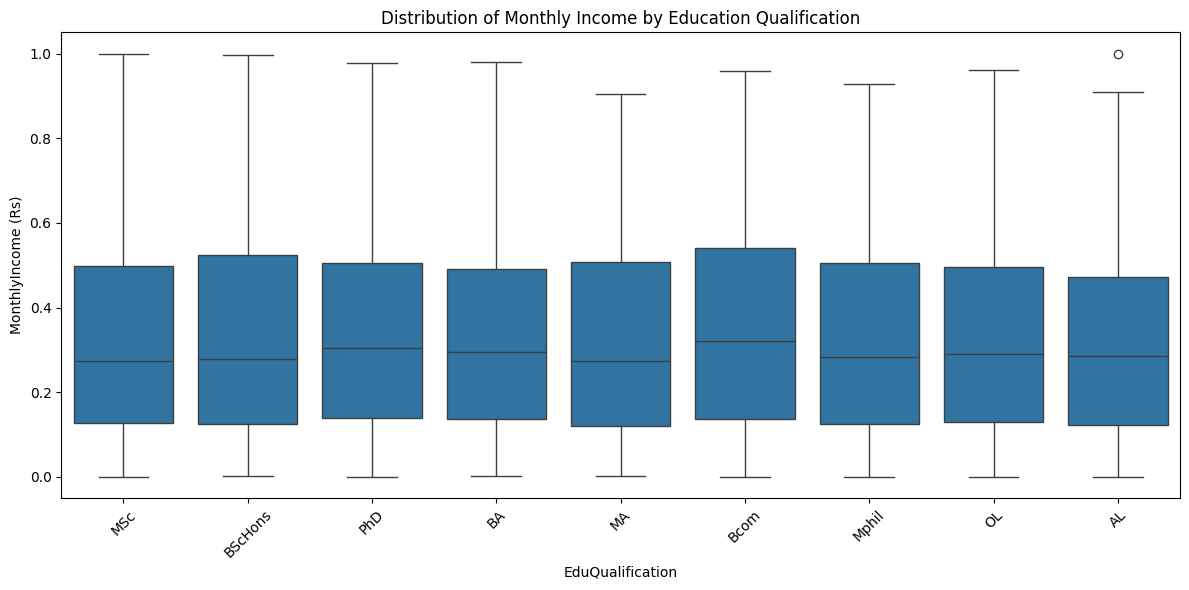

In [ ]:
# Visualization 1: Box plot of MonthlyIncome by EduQualification
plt.figure(figsize=(12, 6))
sns.boxplot(x='EduQualification', y='MonthlyIncome (Rs)', data=df_cleaned)
plt.title('Distribution of Monthly Income by Education Qualification')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


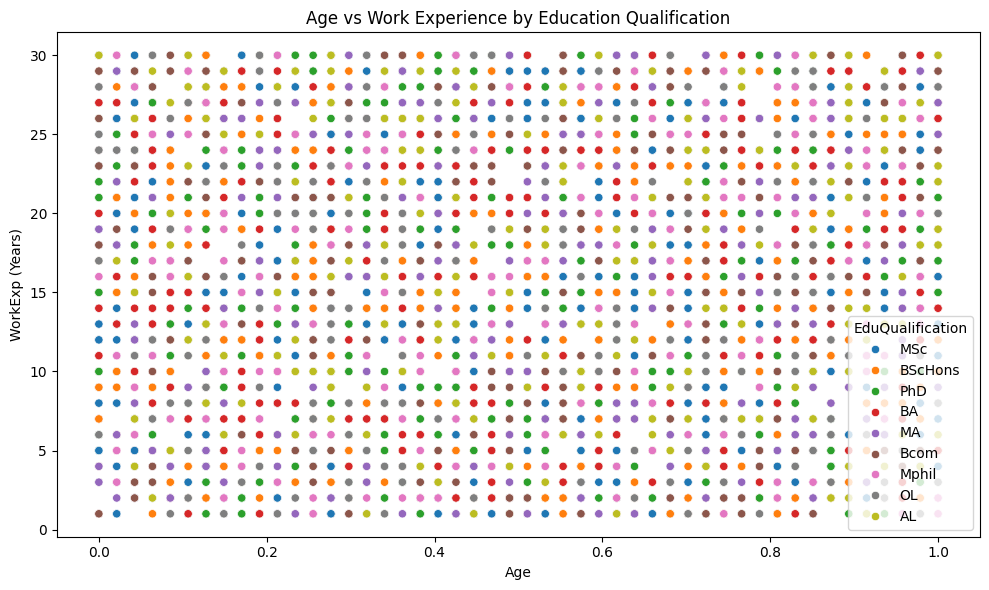

In [ ]:
# Visualization 2: Scatter plot of Age vs WorkExp with color-coded EduQualification
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='WorkExp (Years)', hue='EduQualification', data=df_cleaned)
plt.title('Age vs Work Experience by Education Qualification')
plt.tight_layout()
plt.show()